#CODECHEF-VIT RECRUITMENTS 2025

#Step 0: Copy this notebook

**Guidelines**:
*   Make a copy of this notebook in your Google Drive
*   Submit the editted colab notebook as your final submission



#Step 1: Import the dataset

Guidelines: Run the code below to get the dataset

In [2]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
           "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=columns, skipinitialspace=True)

In [3]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [5]:
data = data.drop(['relationship', 'race', 'native-country'], axis=1)

#Step 2: Import Libraries

**Guidelines**: Import the necessary libraries

In [6]:
!pip install scikit-learn==1.2.2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, PowerTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

!pip install --upgrade xgboost

#Step 3: Perform Task

**Guidelines**: Peform the given task

In [7]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
sex,0
capital-gain,0
capital-loss,0


In [8]:
data.duplicated().sum()

31

In [9]:
data = data.drop_duplicates() #dropping duplicates

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32530.000000,3.253000e+04,32530.000000,32530.000000,32530.000000,32530.000000
mean,38.588903,1.897908e+05,10.081955,1078.675807,87.387027,40.441961
std,13.637505,1.055648e+05,2.571882,7388.735358,403.143165,12.346543
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178188e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783765e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370315e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
# Apply Label Encoding to ordinal categorical columns
label_encoder = {}
ordinal_features = ["workclass", "education", "income", "sex", "marital-status", "occupation"]

for col in ordinal_features:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col])
  label_encoder[col] = le

for col, le in label_encoder.items():
    print(f"{col} Mapping:")
    for i, class_ in enumerate(le.classes_):
        print(f"  {class_} -> {i}")
    print()

workclass Mapping:
  ? -> 0
  Federal-gov -> 1
  Local-gov -> 2
  Never-worked -> 3
  Private -> 4
  Self-emp-inc -> 5
  Self-emp-not-inc -> 6
  State-gov -> 7
  Without-pay -> 8

education Mapping:
  10th -> 0
  11th -> 1
  12th -> 2
  1st-4th -> 3
  5th-6th -> 4
  7th-8th -> 5
  9th -> 6
  Assoc-acdm -> 7
  Assoc-voc -> 8
  Bachelors -> 9
  Doctorate -> 10
  HS-grad -> 11
  Masters -> 12
  Preschool -> 13
  Prof-school -> 14
  Some-college -> 15

income Mapping:
  <=50K -> 0
  >50K -> 1

sex Mapping:
  Female -> 0
  Male -> 1

marital-status Mapping:
  Divorced -> 0
  Married-AF-spouse -> 1
  Married-civ-spouse -> 2
  Married-spouse-absent -> 3
  Never-married -> 4
  Separated -> 5
  Widowed -> 6

occupation Mapping:
  ? -> 0
  Adm-clerical -> 1
  Armed-Forces -> 2
  Craft-repair -> 3
  Exec-managerial -> 4
  Farming-fishing -> 5
  Handlers-cleaners -> 6
  Machine-op-inspct -> 7
  Other-service -> 8
  Priv-house-serv -> 9
  Prof-specialty -> 10
  Protective-serv -> 11
  Sales -> 12
 

In [13]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,income
0,39,7,77516,9,13,4,1,1,2174,0,40,0
1,50,6,83311,9,13,2,4,1,0,0,13,0
2,38,4,215646,11,9,0,6,1,0,0,40,0
3,53,4,234721,1,7,2,6,1,0,0,40,0
4,28,4,338409,9,13,2,10,0,0,0,40,0


In [14]:
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

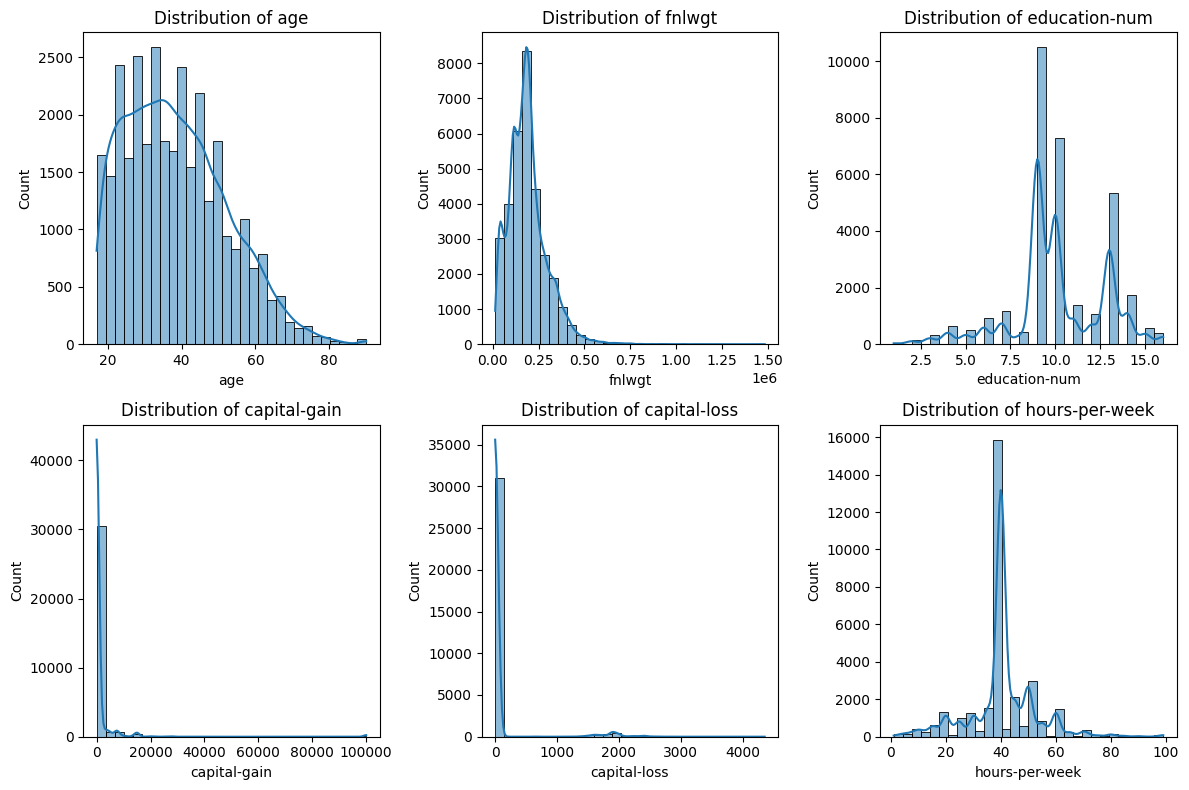

In [15]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

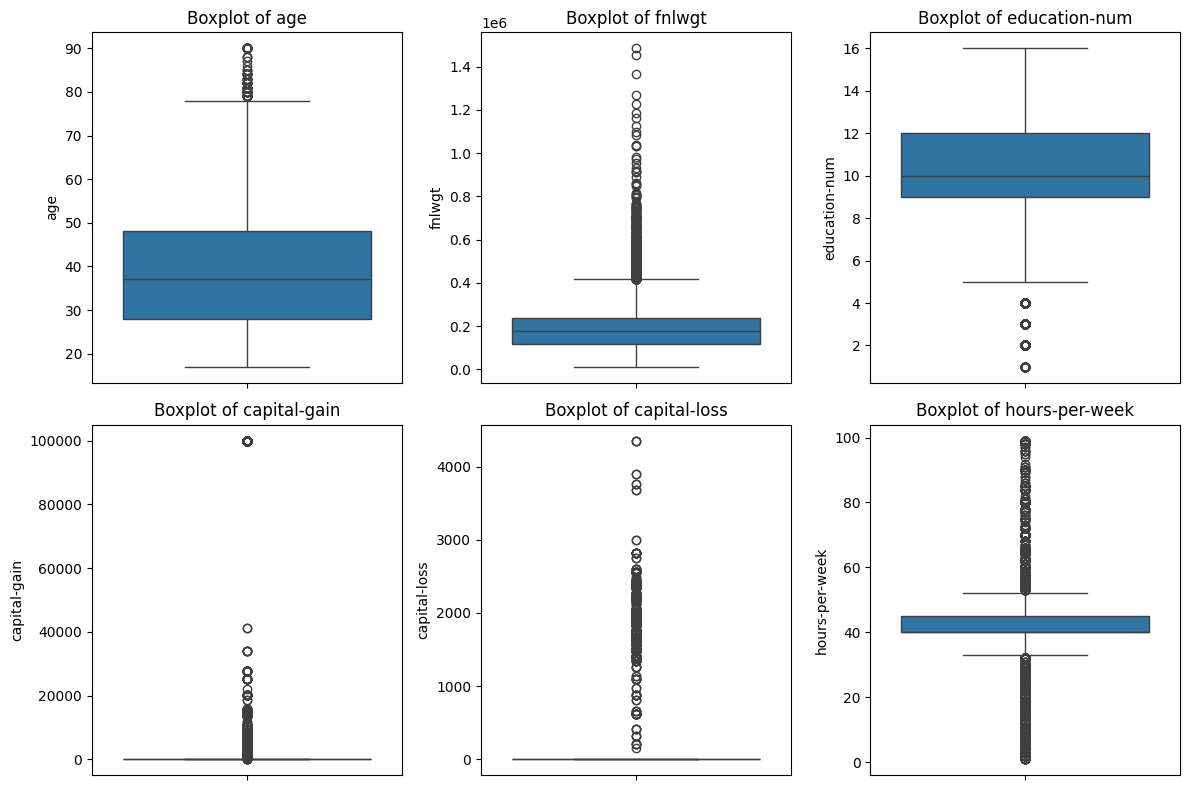

In [16]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

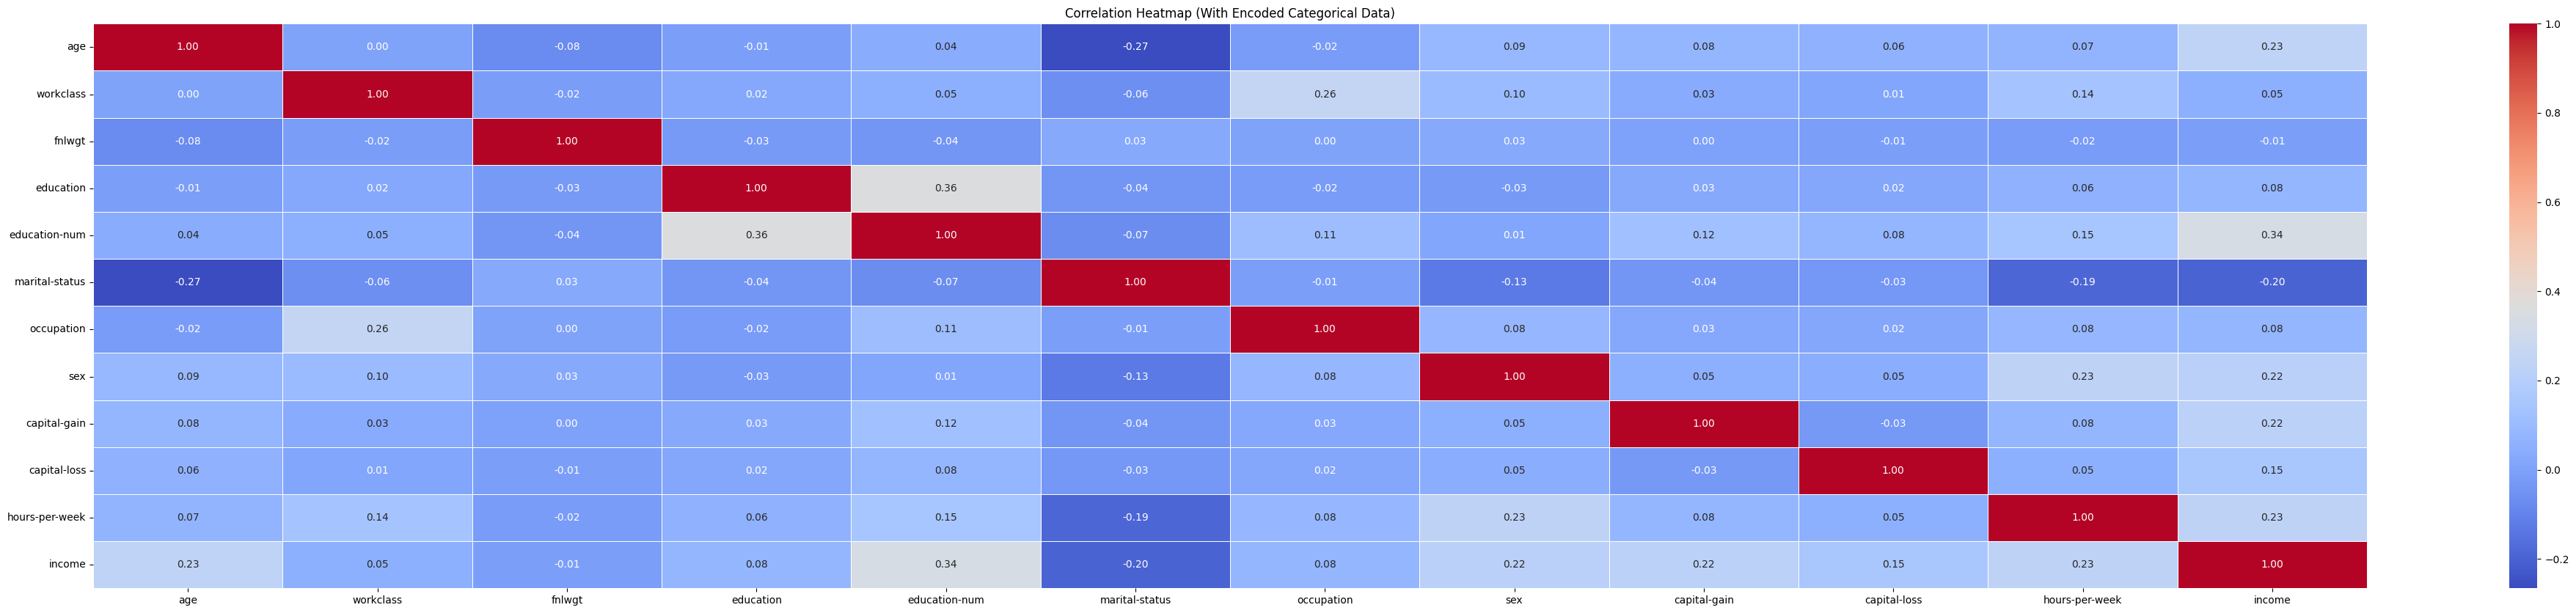

In [17]:
# Convert all columns to numeric if possible
numeric_data = data.apply(pd.to_numeric, errors='coerce')

# Drop non-numeric columns if necessary
numeric_data = numeric_data.dropna(axis=1)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(50, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Encoded Categorical Data)")
plt.show()

In [18]:
from sklearn.preprocessing import RobustScaler
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
scaler = RobustScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [19]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,sex,capital-gain,capital-loss,hours-per-week,income
0,0.10,7,-0.846055,9,1.000000,4,1,1,2174.0,0.0,0.0,0
1,0.65,6,-0.797444,9,1.000000,2,4,1,0.0,0.0,-5.4,0
2,0.05,4,0.312630,11,-0.333333,0,6,1,0.0,0.0,0.0,0
3,0.80,4,0.472638,1,-1.000000,2,6,1,0.0,0.0,0.0,0
4,-0.45,4,1.342411,9,1.000000,2,10,0,0.0,0.0,0.0,0


In [27]:
X = data.drop(columns=['income'])  # Features
y = data['income']  # Target variable

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
slr = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (26024, 11)
Testing Data Shape: (6506, 11)


In [21]:
correlation_matrix = pd.DataFrame(X_train_scaled).corr()
print(correlation_matrix)

          0         1         2         3         4         5         6   \
0   1.000000  0.014942 -0.074231 -0.015811  0.033566 -0.261407 -0.012229   
1   0.014942  1.000000 -0.019868  0.020239  0.050324 -0.067181  0.259998   
2  -0.074231 -0.019868  1.000000 -0.018569 -0.040996  0.029551 -0.000067   
3  -0.015811  0.020239 -0.018569  1.000000  0.365621 -0.035283 -0.018148   
4   0.033566  0.050324 -0.040996  0.365621  1.000000 -0.070042  0.107652   
5  -0.261407 -0.067181  0.029551 -0.035283 -0.070042  1.000000 -0.017272   
6  -0.012229  0.259998 -0.000067 -0.018148  0.107652 -0.017272  1.000000   
7   0.086933  0.097404  0.024579 -0.030058  0.015465 -0.133813  0.081949   
8   0.078533  0.034630 -0.001531  0.028747  0.132941 -0.042928  0.034658   
9   0.054870  0.018799 -0.008774  0.007130  0.069494 -0.030030  0.010197   
10  0.059528  0.145184 -0.030669  0.052732  0.142406 -0.188294  0.081914   

          7         8         9         10  
0   0.086933  0.078533  0.054870  0.059528

In [28]:
log_model = LogisticRegression(max_iter=27000, solver='saga')
log_model.fit(X_train_scaled, y_train)
# Predictions
y_pred = log_model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [56]:
tree_model = DecisionTreeClassifier(max_depth=6, random_state=42)
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [47]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:11:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [58]:
# Evaluating Logistic Regression
print("Logistic Regression Performance:")
print(classification_report(y_test, log_model.predict(X_test)))

# Evaluating Decision Tree
print("Decision Tree Performance:")
print(classification_report(y_test, tree_model.predict(X_test)))

# Evaluating Random Forest
print("Random Forest Performance:")
print(classification_report(y_test, rf_model.predict(X_test)))

# Evaluating XGBoost
print("XGBoost Performance:")
print(classification_report(y_test, xgb_model.predict(X_test)))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.98      0.12      0.21      4938
           1       0.26      0.99      0.42      1568

    accuracy                           0.33      6506
   macro avg       0.62      0.56      0.32      6506
weighted avg       0.81      0.33      0.26      6506

Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      4938
           1       0.78      0.28      0.42      1568

    accuracy                           0.81      6506
   macro avg       0.80      0.63      0.65      6506
weighted avg       0.80      0.81      0.77      6506

Random Forest Performance:


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4938
           1       0.72      0.63      0.67      1568

    accuracy                           0.85      6506
   macro avg       0.80      0.78      0.79      6506
weighted avg       0.85      0.85      0.85      6506

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4938
           1       0.76      0.67      0.72      1568

    accuracy                           0.87      6506
   macro avg       0.83      0.80      0.82      6506
weighted avg       0.87      0.87      0.87      6506



#Step 4: Results and Inferences

**Guidelines**: List out your inferences here

**Logistic Regression (Poor Performance)**




*   Severe class imbalance: The model predicts Class 1 (positive class) extremely well (99% recall) but fails on Class 0 (negative class) with only 12% recall.
*   High precision for Class 0 (0.98): When it predicts 0, it's mostly correct.
*   Low accuracy (33%): It indicates poor overall performance.
*   Conclusion: Not a suitable model for this problem.





**Decision Tree (Better than Logistic Regression)**



*   Very high recall for Class 0 (97%) → Predicts almost all 0s correctly.
*   Class 1 (minority class): Low recall (28%) → It is missing many true "1" values.
*   Accuracy better than LogisticRegression (81%) but not ideal due to poor recall of class 1


**Random Forest (Better than Decision Tree)**

*    Balanced precision & recall across both classes.
     *    Precision: 0.89 (Class 0), 0.72 (Class 1)  
     Recall: 0.92 (Class 0), 0.63 (Class 1)

*    Higher overall accuracy (85%) suggests a more generalized model.
*    Conclusion: A strong performer but still slightly struggles with Class 1.


**XGBoost (Best Model)**

*    Highest overall accuracy (87%).
*    Best balance of precision & recall across both classes.
    *    Precision: 0.90 (Class 0), 0.76 (Class 1) Recall: 0.93 (Class 0), 0.67 (Class 1)

*   Highest F1-score for Class 1 (0.72), meaning it captures positives better than other models.
*   Conclusion: Best performing-model among all.





